# Aula 3 - Seaborn

Prof. Tiago Dias

[Linkedin](https://www.linkedin.com/in/diasctiago/) | [Github](https://github.com/diasctiago) | [Blog](https://www.dadosaocubo.com/)

### Documentações

[Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

### Seaborn

In [ ]:
# instalando
!pip install seaborn

In [ ]:
# importando a biblioteca
import pandas as pd
import seaborn as sns

In [ ]:
# verificando as base disponíveis no seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# importando algumas bases de dados
flights = sns.load_dataset('flights')
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [27]:
titanic = sns.load_dataset('titanic')
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


#### Gráfico de Barras

In [ ]:
# base de dados titanic
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


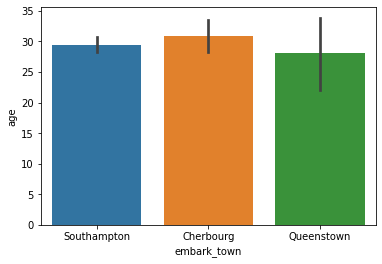

In [ ]:
# qual a média de idade por cidade de embarque?
sns.barplot(data=titanic, x='embark_town', y='age');

In [28]:
titanic.groupby(['embark_town']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
embark_town,,,,,,,,
Cherbourg,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144,0.535714,0.505952
Queenstown,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030,0.480519,0.740260
Southampton,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,0.636646,0.610248


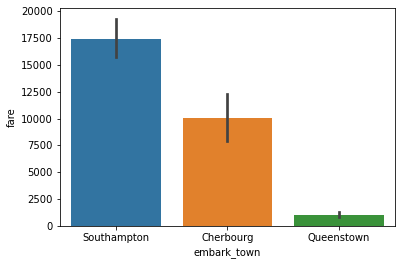

In [29]:
# Qual a soma das tarifas por cidades de embarque?
sns.barplot(data=titanic, x='embark_town', y='fare', estimator=sum);

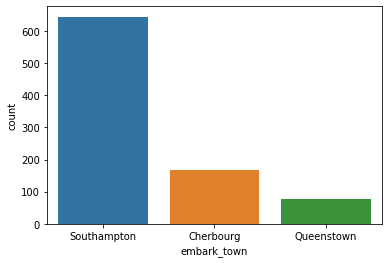

In [ ]:
# Qual a quantidade de pessoas por cidades de embarque?
sns.countplot(data=titanic, x='embark_town');

In [ ]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

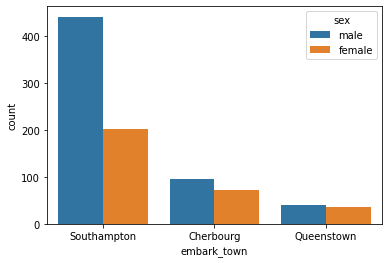

In [ ]:
# Qual a a quantidade de pessoas por cidades de embarque, separando por sexo?
sns.countplot(data=titanic, x='embark_town', hue='sex');

Rectangle(xy=(-0.4, 0), width=0.4, height=441, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=95, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=41, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=203, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=73, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=36, angle=0)


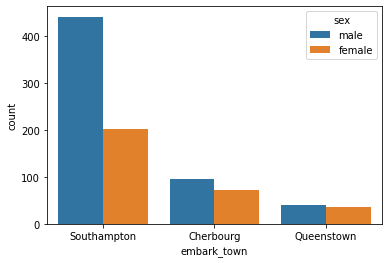

In [ ]:
# colocando o rótulo das colunas no gráfico acima
g1 = sns.countplot(data=titanic, x='embark_town', hue='sex')
for barra in g1.patches:
  print(barra)

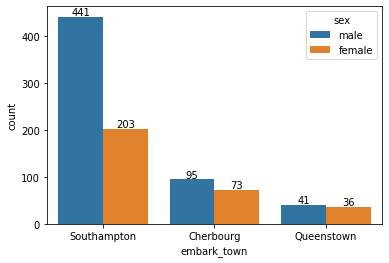

In [ ]:
# colocando o rótulo das colunas no gráfico acima
g1 = sns.countplot(data=titanic, x='embark_town', hue='sex')
for barra in g1.patches:
  g1.annotate(barra.get_height(),
              (barra.get_x()+barra.get_width()/2, barra.get_height()+3),
              ha='center')

#### Gráfico de Linhas

In [ ]:
# base de dados flights
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


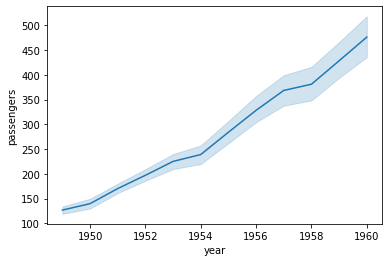

In [ ]:
# Qual a média de passageiros por ano?
sns.lineplot(x='year',y='passengers',data=flights);

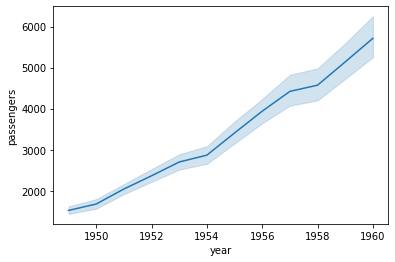

In [ ]:
# Qual a quantidade de passageiros por ano?
sns.lineplot(data=flights, x='year', y='passengers', estimator=sum);

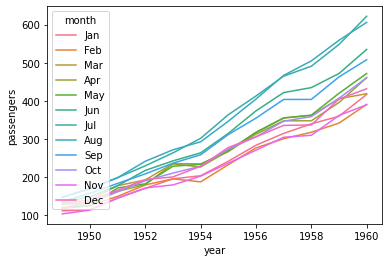

In [ ]:
# Qual a quantidade de passageiros por ano, separando por mês?
sns.lineplot(data=flights, 
             x='year', 
             y='passengers', 
             estimator=sum,
             hue='month');

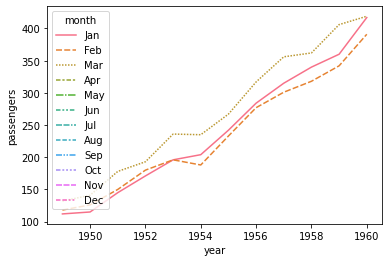

In [ ]:
# Colocando estilo no gráfico acima
flights_filter = flights.query('month in ("Jan","Feb","Mar")')
sns.lineplot(data=flights_filter, 
             x='year', 
             y='passengers', 
             estimator=sum,
             hue='month',
             style='month');

#### Gráfico de Caixa

In [ ]:
# base de dados titanic
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


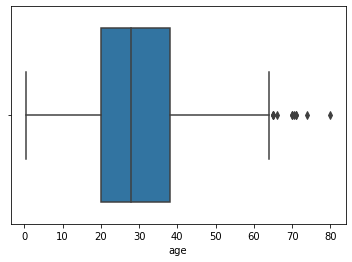

In [ ]:
# Temos outliers nas idades dos passageiros?
sns.boxplot(data=titanic, x='age');

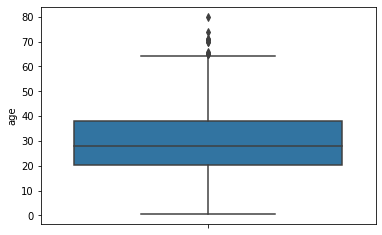

In [ ]:
sns.boxplot(data=titanic, y='age');

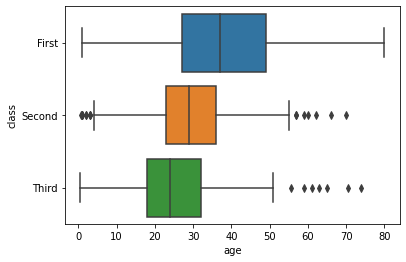

In [ ]:
# Separando por classes, temos outliers nas idades dos passageiros?
sns.boxplot(data=titanic, x='age', y='class');

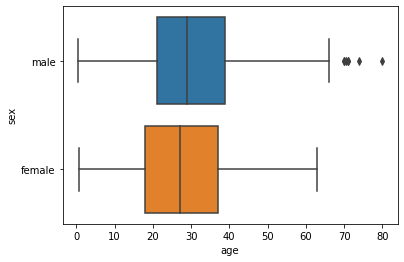

In [ ]:
# Separando por sexo, temos outliers nas idades dos passageiros?
sns.boxplot(data=titanic, x='age', y='sex');

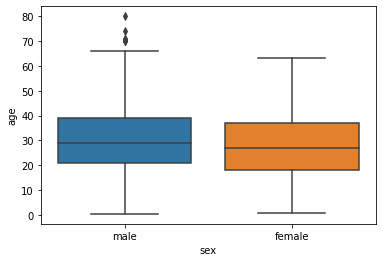

In [ ]:
sns.boxplot(data=titanic, y='age', x='sex');

#### Gráfico de Dispersão

In [ ]:
# base de dados pinguins
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


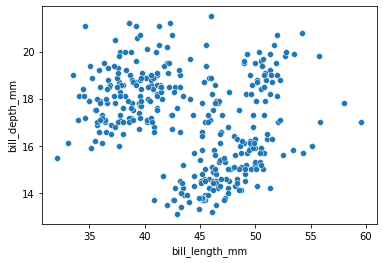

In [ ]:
# observando a relação entre o tamanho e a altura dos bicos dos pinguins
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm');

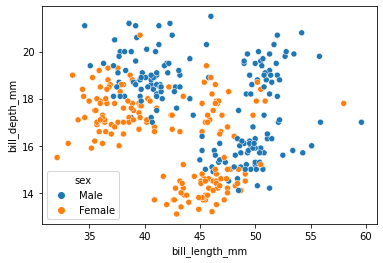

In [ ]:
# observando a relação entre o tamanho e a altura dos bicos dos pinguins, detalhando o sexo
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='sex');

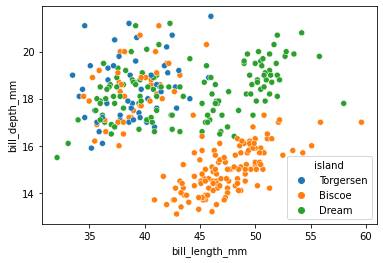

In [ ]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='island');

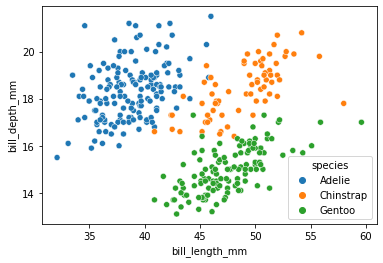

In [ ]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species');

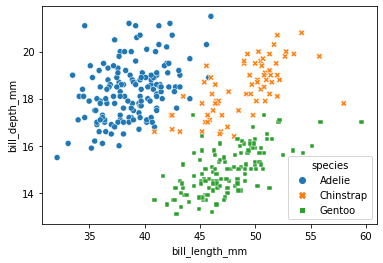

In [ ]:
# colocando um estilo nas observações
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                style='species');

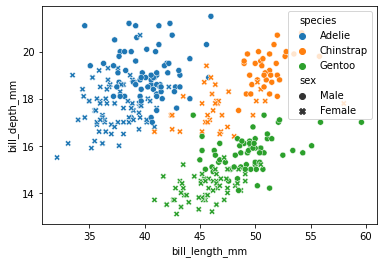

In [ ]:
sns.scatterplot(data=penguins,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                style='sex');

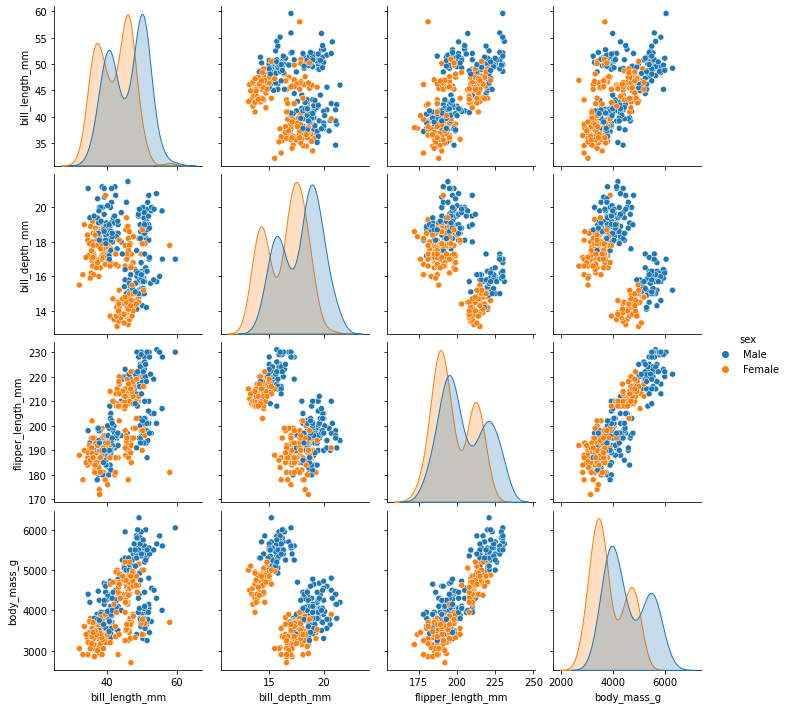

In [ ]:
# Observando a relação entre tamanho do bico, 
# altura do bico, tamanho da nadadeira e peso dos pinguins.
sns.pairplot(penguins,hue='sex');

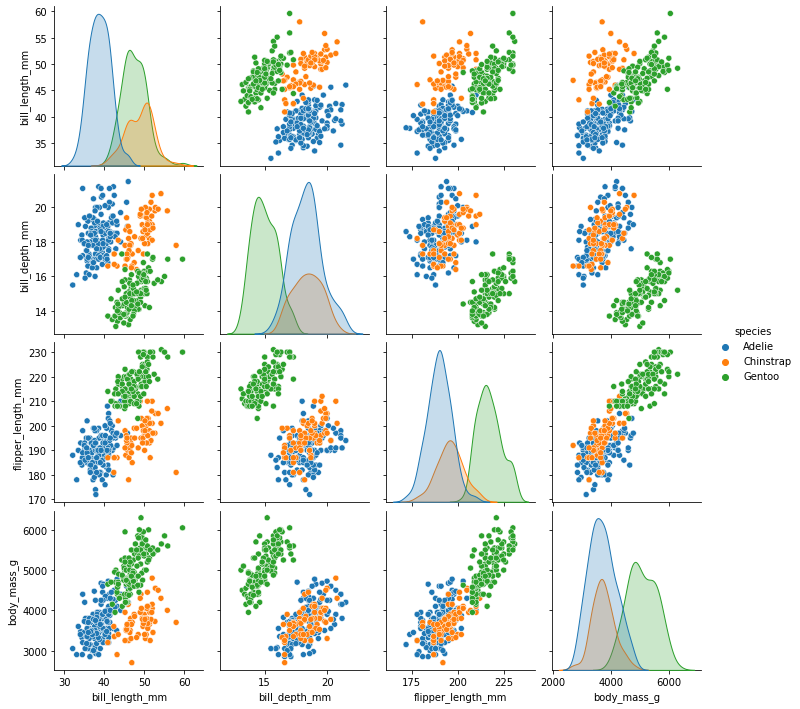

In [ ]:
sns.pairplot(penguins,hue='species');

#### Gráfico Mapa de Calor

In [ ]:
# base de dados pinguins
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [ ]:
# função de correlação
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


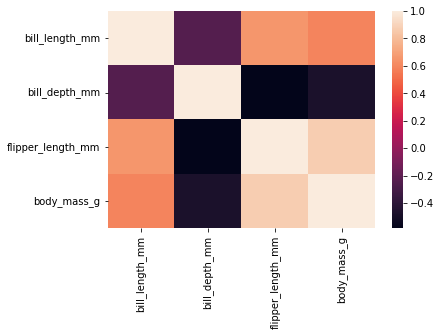

In [ ]:
# Como verificar a correção das variáveis de forma gráfica?
sns.heatmap(penguins.corr());

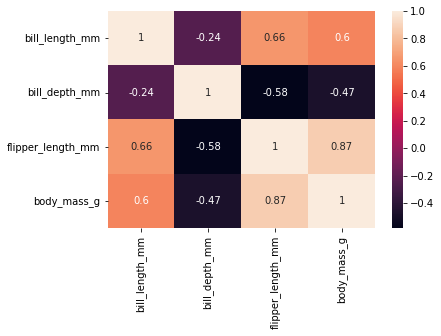

In [ ]:
# acrescentando mais detalhes ao mapa de calor
sns.heatmap(penguins.corr(), annot=True);

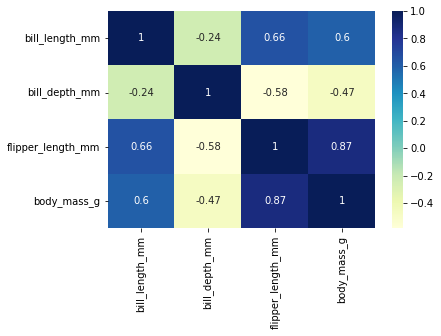

In [ ]:
# alterando as cores do mapa de calor
sns.heatmap(penguins.corr(), annot=True, cmap="YlGnBu");

### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSeahbxqxAmgtt2p_gB9V64XbPnScFoCIYzt3dGFj6uZ5MoW4Q/viewform?usp=sf_link).

Para resolver as questões abaixo utilizar o dataset [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

In [2]:
import pandas as pd
import seaborn as sns


In [6]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Questão 1

Qual o valor médio da gorjeta de acordo com o dia da semana?

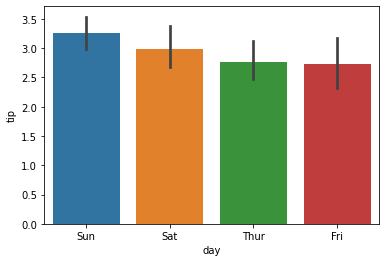

In [8]:
sns.barplot(data=tips, x='day', y='tip');

#### Questão 2

Qual a soma das gorjetas por turno do dia, observando os fumantes e não fumantes?

In [30]:
sns.barplot(data=tip, hue='time', y='tip', estimator=sum);

NameError: name 'tip' is not defined

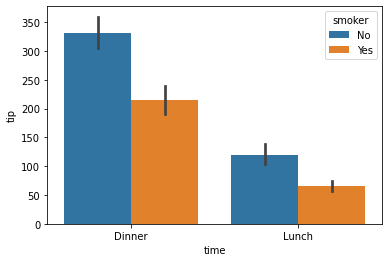

In [34]:
sns.barplot(data=tips, x='time', y='tip', hue='smoker', estimator=sum);

#### Questão 3

Crie uma coluna calculada com o valor da gorjeta por pessoa. Em seguida crie dois gráficos, um com o valor médio da gorjeta de acordo com a quantidade de pessoas da conta e outro com o valor médio da gorjeta individual também de acordo com a quantidade de pessoas da conta.

#### Questão 4

Qual a relação do valor total da conta com o valor da gorjeta?

#### Questão 5

Qual público dá maior quantidade de gorjetas:


1.   Homens ou mulheres?
2.   Fumantes ou não fumantes?



#### Questão 6

Quando temos a maior e a menor soma de gorjetas:


1.   Qual dia da semana?
2.   Qual turno do dia?

